In [1]:
#Import the necessary libraries to perform exploratory data analysis

import pandas as pd #Import Pandas
import numpy as np #Import Numpy

import matplotlib as mpl
import matplotlib.pyplot as plt #Import plotting
from matplotlib.lines import Line2D
import seaborn as sns

*It should be noted that ambulatory surgical centers are not included in this list. This dataset is specific to inpatient discharges. Thus, if there was a surgical procedure that is considered outpatient (e.g. a corneal transplant) the costs for these procedures would not be included in this exploratory data analysis.* 

In [2]:
#Filname path if using Windows Computer
fn = 'C:\Users\Manuel Ramirez\Dropbox\Job Related Folder\Insight Data Science Fellowship\Hospital Inpatient Cost Transparency Beginning 2009.csv'

#Filename path is using Mac at Home
#fn = '/Users/manuelramirez/Dropbox/Job Related Folder/Insight Data Science Fellowship/Hospital Inpatient Cost Transparency Beginning 2009.csv'

#Filename path if using Laptop
#fn = '/Users/Ramirez/Dropbox/Job Related Folder/Insight Data Science Fellowship/Hospital Inpatient Cost Transparency Beginning 2009.csv'

#Read dataset into a dataframe
df = pd.read_csv(fn)

# Which APR DRG classifications saw the most amount of discharges in NYS?

*For this section, I want to plot the total discharges for all NYS hospitals over time for the APR DRG classifications which saw the most patients. These plots will be line plots in order to notice any increasing or decreasing trends. Discharges for all Severity of Illness will be summed together, for all hospitals.* 

## Determine which are the top 10 APR DRG classifications which saw the most amount of discharges

In [3]:
df2 = df.copy() #Make copy of original dataframe

In [4]:
tAPRDRG_dis = df2.groupby('APR DRG Code')['Discharges'].sum().sort_values(ascending=False)[:15] #top APR DRG Discharges
tAPRDRG_dis_ind = tAPRDRG_dis.index.tolist() #Get APR DRG Codes as a list
#tAPRDRG_dis #View Results

In [5]:
#Discharges sorted in descending order grouped by the APR DRG Code and year
tAPRDRG_disY = df2.groupby(['APR DRG Code','Year'])['Discharges'].sum().sort_values(ascending=False)
tAPRDRG_disY = tAPRDRG_disY.loc[tAPRDRG_dis_ind].sort_index() #Isolate the top 15 
#tAPRDRG_disY.unstack() #View Results

In [6]:
#Create a new dataframe which only contains the APR DRG Codes and their corresponding description
df_APRDRG = pd.DataFrame({
    'APR DRG Code':pd.unique(df2.loc[:,'APR DRG Code']),
    'APR DRG Description':pd.unique(df2.loc[:,'APR DRG Description']),
    }).set_index('APR DRG Code')

#Shorten Description Names
df_APRDRG.loc[640] = 'Newborn (>2.5lbs), Normal Or Other Condition'
df_APRDRG.loc[720] = 'Septicemia'
df_APRDRG.loc[140] = 'COPD'
df_APRDRG.loc[383] = 'Cellulitis & Oth. Bact. Skin Infections'
df_APRDRG.loc[560] = 'Natural Delivery'

#df_APRDRG #View Result

## Separate between those APR DRG classifications which saw an increase vs. a decrease in the total number of discharges over time

In [7]:
#Create empty list to store APR DRG Codes for:
Dis_inc = [] #Discharges Increasing
Dis_dec = [] #Discharges Decreasing

for APR_DRG_Code in tAPRDRG_dis_ind:
    if tAPRDRG_disY[APR_DRG_Code,2009] > tAPRDRG_disY[APR_DRG_Code,2016]: #Num of Discharges Decreased
        Dis_dec.append(APR_DRG_Code)
    else:
        Dis_inc.append(APR_DRG_Code)

#len(Dis_inc) #Output = 4
#len(Dis_dec) #Output = 11

#Dis_inc #View Results
#Dis_dec #View Results

## Plot the results

*A line plot will be used for each APR DRG Classification. The Y axis will be the total number of discharges. The X axis will be time. The figure will contain a series of subplots, where each subplot is a line plot.* 

In [8]:
#Variables to be used in most, if not all the plots
Nyears = np.sort(df2.loc[:,'Year'].unique()) #Array holding years
#Years_Xax = np.arange(len(Nyears)) #[0...7] array matching length of # of years
#APRDRG_Yax = np.arange(len(Y_ticks)) #[0...12] array matching length of # of APR DRGs

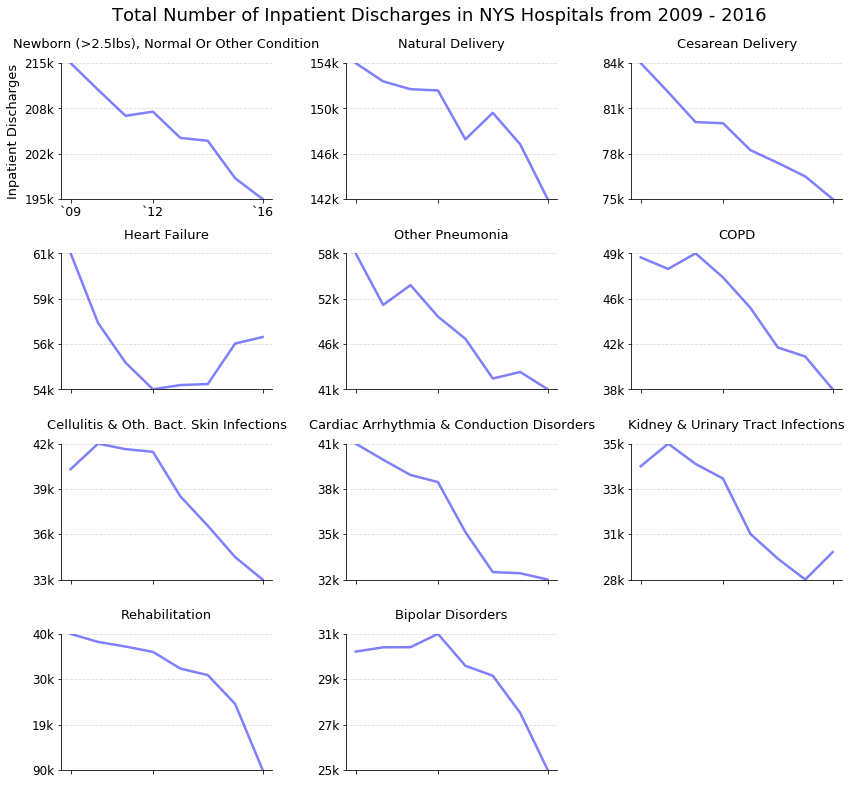

In [9]:
fig1 = plt.figure(figsize=(14,13)) #Create Figure
plot_num = 1 #Iterate over the Index of the Subplot

#First, plot the APR DRG Codes where the total number of discharges decreased over time.
for APR_DRG_Code in Dis_dec:
    
    ax1 = fig1.add_subplot(4,3,plot_num)
    ax1.plot(Nyears,tAPRDRG_disY.loc[APR_DRG_Code].tolist(),linewidth=2.5,alpha=0.5,linestyle='-',color='b')
    
    #Modify plot aesthetics
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.grid(True,which='major',axis='y',color='k',alpha=0.15,linestyle='--')

    #Modify Y Axis  
    dummy_a = np.linspace(tAPRDRG_disY.loc[APR_DRG_Code].min(),tAPRDRG_disY.loc[APR_DRG_Code].max(),4)
    ax1.set_ylim(np.min(dummy_a),np.max(dummy_a))
    ax1.set_yticks(dummy_a)
    
    #Modify Y Axis by Truncating zeros and adding a 'k' to the end (e.g. 10k instead of 10000.0)
    dummy_a = dummy_a.round(-3).tolist()
    dummy_a = [str(y1)[:-2] for y1 in dummy_a] #Get rid of the decimal

    #Truncate Zeros
    if len(dummy_a[-1]) == 6:
        dummy_a = [y1[:3]+str('k') for y1 in dummy_a] #Change values from those belonging to hundreds of thousands
    elif len(dummy_a[-1]) == 5:
        dummy_a = [y1[:2]+str('k') for y1 in dummy_a] #Change values from those belonging to tens of thousands

    ax1.set_yticklabels(dummy_a,fontsize=12)

    #Modify X Axis
    ax1.set_xticks([2009,2012,2016])
    
    #If it is the 1st plot of the series, add X-axis and Y-axis labels
    if plot_num == 1:
        ax1.set_xticklabels(['`09','`12','`16',],fontsize=12.5)  
        ax1.set_ylabel('Inpatient Discharges',fontsize=13)
    else: #Else, just have the ticks with empty spaces
        ax1.set_xticklabels(['',''])

    #Add a title for each series in the line graphs
    ax1.set_title(df_APRDRG.loc[APR_DRG_Code].tolist()[0],fontsize=13,pad=15)
    
    #Increment plot_num by 1
    plot_num += 1

#Adjust spacing between graphs
plt.subplots_adjust(wspace=0.35,hspace=0.4)

fig1.suptitle('Total Number of Inpatient Discharges in NYS Hospitals from 2009 - 2016',x=0.5,y=0.94,fontsize=18)

#Save the result
plt.savefig('sumDischargesDecreasing.jpg',bbox_inches='tight')

plt.show()

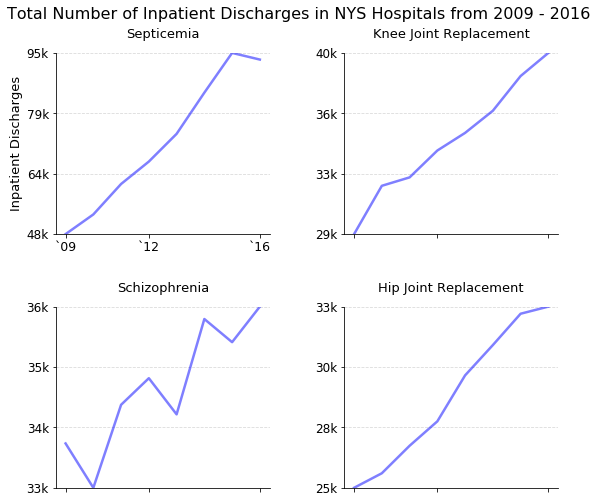

In [10]:
fig2 = plt.figure(figsize=(9,8)) #Create Figure
plot_num = 1 #Iterate over the Index of the Subplot

#First, plot the APR DRG Codes where the total number of discharges increased over time.
for APR_DRG_Code in Dis_inc:
    
    ax2 = fig2.add_subplot(2,2,plot_num)
    ax2.plot(Nyears,tAPRDRG_disY.loc[APR_DRG_Code].tolist(),linewidth=2.5,alpha=0.5,linestyle='-',color='b')
    
    #Modify plot aesthetics
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.grid(True,which='major',axis='y',color='k',alpha=0.15,linestyle='--')

    #Modify Y Axis  
    dummy_a = np.linspace(tAPRDRG_disY.loc[APR_DRG_Code].min(),tAPRDRG_disY.loc[APR_DRG_Code].max(),4)
    ax2.set_ylim(np.min(dummy_a),np.max(dummy_a))
    ax2.set_yticks(dummy_a)
    
    #Modify Y Axis by Truncating zeros and adding a 'k' to the end (e.g. 10k instead of 10000.0)
    dummy_a = dummy_a.round(-3).tolist()
    dummy_a = [str(y1)[:-2] for y1 in dummy_a] #Get rid of the decimal

    #Truncate Zeros
    if len(dummy_a[-1]) == 6:
        dummy_a = [y1[:3]+str('k') for y1 in dummy_a] #Change values from those belonging to hundreds of thousands
    elif len(dummy_a[-1]) == 5:
        dummy_a = [y1[:2]+str('k') for y1 in dummy_a] #Change values from those belonging to tens of thousands

    ax2.set_yticklabels(dummy_a,fontsize=12)

    #Modify X Axis
    ax2.set_xticks([2009,2012,2016])
    
    #If it is the 1st plot of the series, add X-axis and Y-axis labels
    if plot_num == 1:
        ax2.set_xticklabels(['`09','`12','`16',],fontsize=12.5)  
        ax2.set_ylabel('Inpatient Discharges',fontsize=13)
    else: #Else, just have the ticks with empty spaces
        ax2.set_xticklabels(['',''])

    #Add a title for each series in the line graphs
    ax2.set_title(df_APRDRG.loc[APR_DRG_Code].tolist()[0],fontsize=13,pad=15)
    
    #Increment plot_num by 1
    plot_num += 1

#Adjust spacing between graphs
plt.subplots_adjust(wspace=0.35,hspace=0.4)

fig2.suptitle('Total Number of Inpatient Discharges in NYS Hospitals from 2009 - 2016',x=0.5,y=0.96,fontsize=16)

#Save the result
plt.savefig('sumDischargesIncreasing.jpg',bbox_inches='tight')

plt.show()

# How has the amount hospitals charge for, and the amount it costs a hospital to perform changed over time for the top APR DRG classifications? 

*In this section, I will create a horizontal arrow chart where I show the increase in Hospital Charges and Costs over time. Note: Charge indicates how much a hospital bills an insurance company (or individual). Cost indicates how much it costs a hospital to perform a procedure. These are both values found within the original dataset and* **represent the sticker price (i.e. not adjusted for inflation)**

In [11]:
#Using the index of the top APR DRG Codes, group the dataframe by the average hospital charges, 
#and then take their average
temp = df2.groupby(['APR DRG Code','Year'])['Mean Charge'].mean()
sAPRDRG_Ch = temp.loc[tAPRDRG_dis_ind] #Series APR DRG Charge for top APR DRG Classification

#Using the index of the top APR DRG Codes, group the dataframe by the average hospital cost, 
#and then take their average
temp = df2.groupby(['APR DRG Code','Year'])['Mean Cost'].mean()
sAPRDRG_Co = temp.loc[tAPRDRG_dis_ind] #Series APR DRG Cost for top APR DRG Classification

#sAPRDRG_Ch.unstack() #View Result
#sAPRDRG_Co.unstack() #View Result

In [12]:
#Sort the APR DRG Classifications by how much the charges went up from 2009 to 2016

ch_increase = sAPRDRG_Ch[:,2016] - sAPRDRG_Ch[:,2009] #Calculate Charge Increase
df_APRDRG_Ch = sAPRDRG_Ch.unstack() #Unstack series into a dataframe
df_APRDRG_Ch['Increase Over Time'] = ch_increase #Add column storing change in price
sAPRDRG_Ch_schInc = df_APRDRG_Ch.sort_values('Increase Over Time').index.tolist() #Sort by descending change in price, obtain
#newly sorted APR DRG Codes

#sAPRDRG_Ch_schInc #Visualize Results
#df_APRDRG_Ch #Visualize Results

In [13]:
#Isolate charges for 2009 and 2016 from dataframe
df_APRDRG_ChXY = df_APRDRG_Ch.loc[:,[2009,2016]] #Isolate the Charges for 2009 and 2016 only

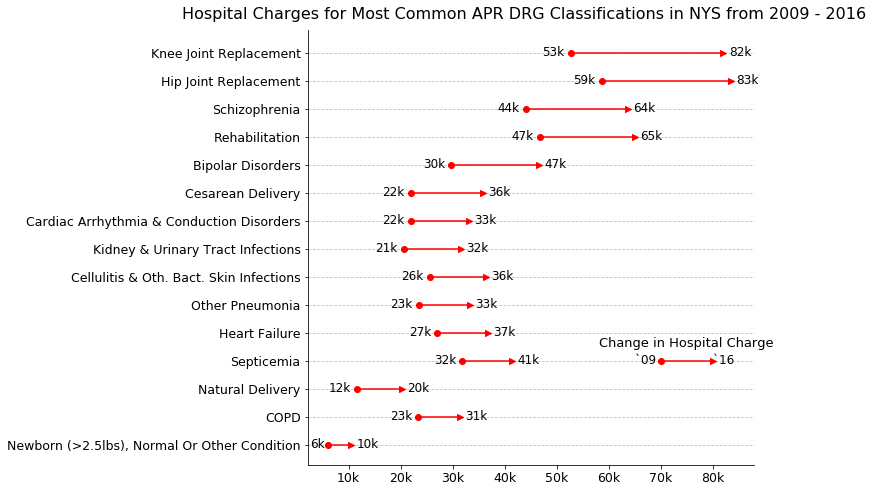

In [14]:
fig3 = plt.figure(figsize=(8,8))
ax3 = fig3.add_subplot(1,1,1)

n = 1

for APR_DRG_Code in sAPRDRG_Ch_schInc:
    
    #Plot the Hospital Charges
    ax3.plot(df_APRDRG_ChXY.loc[APR_DRG_Code].tolist(),[n]*2,color='r') #Plot a horizontal line beginning at 2009 ending at 2016
    ax3.scatter(df_APRDRG_ChXY.loc[APR_DRG_Code,2009],n,color='r',marker='o') #Add a circular mark denoting value at 2009
    ax3.scatter(df_APRDRG_ChXY.loc[APR_DRG_Code,2016],n,color='r',marker='>') #Add a triangular mark denoting value at 2016

    #Annotate the Line Plots
    if df_APRDRG_ChXY.loc[APR_DRG_Code,2009] < 10000:
        txt_09 = str(df_APRDRG_ChXY.loc[APR_DRG_Code,2009].round(-3)) #Add text specifying initial hospital charge
        txt_09 = txt_09[:1]+str('k')
        ax3.annotate(txt_09,(df_APRDRG_ChXY.loc[APR_DRG_Code,2009],n),(df_APRDRG_ChXY.loc[APR_DRG_Code,2009]-3500,n-0.10),
             fontsize=12)
    else:
        txt_09 = str(df_APRDRG_ChXY.loc[APR_DRG_Code,2009].round(-3)) #Add text specifying initial hospital charge
        txt_09 = txt_09[:2]+str('k') 
        ax3.annotate(txt_09,(df_APRDRG_ChXY.loc[APR_DRG_Code,2009],n),(df_APRDRG_ChXY.loc[APR_DRG_Code,2009]-5500,n-0.10),
                     fontsize=12)
    
    txt_16 = str(df_APRDRG_ChXY.loc[APR_DRG_Code,2016].round(-3)) #Add text specifying final hospital charge
    txt_16 = txt_16[:2]+str('k')
    ax3.annotate(txt_16,(df_APRDRG_ChXY.loc[APR_DRG_Code,2016],n),(df_APRDRG_ChXY.loc[APR_DRG_Code,2016]+1000,n-0.10),
                 fontsize=12)
    
    n += 1
    
#Modify plot aesthetics
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

#Add Horizontal Grid Lines
ax3.grid(which='major',axis='y',color='k',alpha=0.25,linestyle='--')
    
#Modify Yaxis ticks, labels
ax3.set_yticks(np.arange(1,len(sAPRDRG_Ch_schInc)+1,1))
ax3.set_yticklabels(df_APRDRG.loc[sAPRDRG_Ch_schInc,'APR DRG Description'].tolist(),fontsize=12.5)

#Modify Xaxis ticks, labels
ax3.set_xticks(np.arange(0,100000,10000))
ax3.set_xticklabels(['0','10k','20k','30k','40k','50k','60k','70k','80k','90k'],fontsize=12.5)

#Add Figure Title
fig3.suptitle('Hospital Charges for Most Common APR DRG Classifications in NYS from 2009 - 2016',
              x=0.5,y=0.92,fontsize=16)

#Add Custom Legend 
ax3.plot([70000,80000],[4,4],color='r')
ax3.scatter(70000,4,color='r',marker='o')
ax3.scatter(80000,4,color='r',marker='>')
ax3.annotate('`09',(70000,4),(65000,3.9),fontsize=12)
ax3.annotate('`16',(80000,4),(80000,3.9),fontsize=12)
ax3.annotate('Change in Hospital Charge',(65000,4.5),(58000,4.5),fontsize=13)

#Save the result
plt.savefig('Charges.jpg',bbox_inches='tight')

plt.show()

# How does the price increase for Hip and Knee Replacement Surgery compare to its cost?

*In this section, I want to draw attention to the markup in hospital charges for the top 2 APR DRG Categories: Knee and Hip Joint Replacement Surgery. Specifically, I want to draw two line plots with the area between them filled in, which will denote the absolute markup. And then annotate the ends to exemplify the %markup at '09 vs.'16.* 

In [15]:
#Isolate information for knee replacement
bool_kr = df2.loc[:,'APR DRG Code'] == 301 #APR DRG Code for Knee Replacement
df_costcharge_kr = df2[bool_kr] #New dataframe with Knee Replacement only

#Create a new dataframe to store results
df_kr = pd.DataFrame(data={
    'Average Hospital Charge':df_costcharge_kr.groupby(['Year'])['Mean Charge'].mean(),
    'Average Hospital Cost':df_costcharge_kr.groupby(['Year'])['Mean Cost'].mean()},index=Nyears)

df_kr['Average Absolute Hospital Markup'] = df_kr.loc[:,'Average Hospital Charge'] - df_kr.loc[:,'Average Hospital Cost']
df_kr['Average % Markup'] = df_kr.loc[:,'Average Absolute Hospital Markup']/df_kr.loc[:,'Average Hospital Cost']*100

#df_kr #Visualize Results

,Average Hospital Charge,Average Hospital Cost,Average Absolute Hospital Markup,Average % Markup
2009,58562.690513,26494.597201,32068.093313,121.036350
2010,57011.291994,25884.860283,31126.431711,120.249564
2011,62032.841536,26595.917900,35436.923636,133.241965
2012,67655.527068,26118.029810,41537.497258,159.037636
2013,72272.925444,27599.972014,44672.953430,161.858691
2014,77954.752738,29663.998232,48290.754506,162.792467
2015,79317.673761,30417.292390,48900.381371,160.765070
2016,83409.041068,32319.362627,51089.678441,158.077618


In [16]:
#Isolate information for hip replacement
bool_hr = df2.loc[:,'APR DRG Code'] == 302 #APR DRG Code for Hip Replacement
df_costcharge_hr = df2[bool_hr] #New dataframe with Hip Replacement only

#Create a new dataframe to store results
df_hr = pd.DataFrame(data={
    'Average Hospital Charge':df_costcharge_hr.groupby(['Year'])['Mean Charge'].mean(),
    'Average Hospital Cost':df_costcharge_hr.groupby(['Year'])['Mean Cost'].mean()},index=Nyears)

df_hr['Average Absolute Hospital Markup'] = df_hr.loc[:,'Average Hospital Charge'] - df_hr.loc[:,'Average Hospital Cost']
df_hr['Average % Markup'] = df_hr.loc[:,'Average Absolute Hospital Markup'] / df_hr.loc[:,'Average Hospital Cost'] *100

#df_hr #Visualize Results

,Average Hospital Charge,Average Hospital Cost,Average Absolute Hospital Markup,Average % Markup
2009,52633.930657,24110.096715,28523.833942,118.306593
2010,52018.919014,23513.079225,28505.839789,121.233972
2011,57310.661212,24767.330998,32543.330214,131.396194
2012,60976.094055,23752.930899,37223.163156,156.709769
2013,64076.646452,24838.707097,39237.939355,157.970941
2014,70392.742665,27021.856712,43370.885953,160.502983
2015,71820.618278,27189.446849,44631.171429,164.148876
2016,81989.911006,31803.734892,50186.176114,157.799630


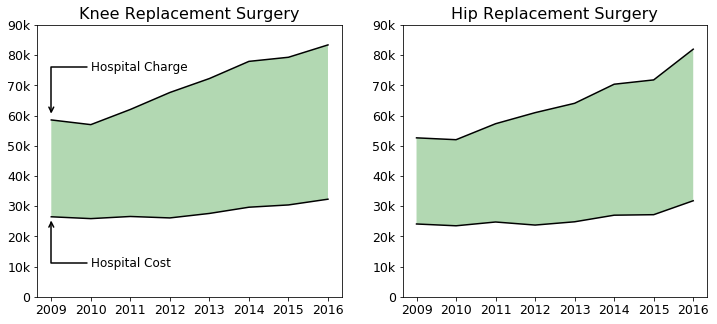

In [17]:
fig4 = plt.figure(figsize=(12,5))

ylabel4 = ['0','10k','20k','30k','40k','50k','60k','70k','80k','90k']

#Plot Knee Replacement
ax4_kr = fig4.add_subplot(1,2,1)
ax4_kr.plot(Nyears,df_kr.loc[:,'Average Hospital Charge'],color='k')
ax4_kr.plot(Nyears,df_kr.loc[:,'Average Hospital Cost'],color='k')
ax4_kr.fill_between(Nyears,df_kr.loc[:,'Average Hospital Cost'],df_kr.loc[:,'Average Hospital Charge'],facecolor='g',alpha=0.3)

#Set X and Y Axis
ax4_kr.set_yticks(np.arange(0,100000,10000))
ax4_kr.set_yticklabels(['0','10k','20k','30k','40k','50k','60k','70k','80k','90k'],fontsize=12.5)

ax4_kr.set_xticks(Nyears.tolist())
ax4_kr.set_xticklabels(Nyears.tolist(),fontsize=12.5)

#Annotate Graph
ax4_kr.annotate('Hospital Charge',
                 xy=(2009,60000),
                 xytext=(2010,75000),
                 arrowprops=dict(linewidth=1.5,
                                 facecolor='black',
                                 arrowstyle='->',
                                 connectionstyle='angle,angleA=0,angleB=90'),
                 fontsize=12,
                )

ax4_kr.annotate('Hospital Cost',
                 xy=(2009,df_kr.loc[:,'Average Hospital Cost'].min()),
                 xytext=(2010,10000),
                 arrowprops=dict(linewidth=1.5,
                                 facecolor='black',
                                 arrowstyle='->',
                                 connectionstyle='angle,angleA=0,angleB=90'),
                 fontsize=12,
                )

#Set Title
ax4_kr.set_title('Knee Replacement Surgery',fontsize=16)

#Plot Hip Replacement
ax4_hr = fig4.add_subplot(1,2,2)
ax4_hr.plot(Nyears,df_hr.loc[:,'Average Hospital Charge'],color='k')
ax4_hr.plot(Nyears,df_hr.loc[:,'Average Hospital Cost'],color='k')
ax4_hr.fill_between(Nyears,df_hr.loc[:,'Average Hospital Cost'],df_hr.loc[:,'Average Hospital Charge'],facecolor='g',alpha=0.3)

#Set X and Y Axis
ax4_hr.set_yticks(np.arange(0,100000,10000))
ax4_hr.set_yticklabels(['0','10k','20k','30k','40k','50k','60k','70k','80k','90k'],fontsize=12.5)

ax4_hr.set_xticks(Nyears.tolist())
ax4_hr.set_xticklabels(Nyears.tolist(),fontsize=12.5)

#Set Title
ax4_hr.set_title('Hip Replacement Surgery',fontsize=16)

plt.savefig('KR_HR Cost_Charges.jpg',bbox_inches='tight')

plt.show()

## Are patients getting more sick with septicemia over time?

In [18]:
#Isolate information for septicemia
bool_sep = df2.loc[:,'APR DRG Code'] == 720 #Septicemia
df_sep_SoI = df2[bool_sep].groupby(['Year','APR Severity of Illness Code'])['Discharges'].sum().unstack() #New Dataframe with 
#Septicemia Only

df_sep_SoI['Total Discharges'] = df2[bool_sep].groupby('Year')['Discharges'].sum()

s_sep_SoI = df_sep_SoI.values #Get the values from the new dataframe
s_sep_SoI = s_sep_SoI.astype('float64') #Cast as Float64 from Int64

#df_sep_SoI #Visualize Results


*Instead of looking at the discharge values, let's look at the percentage of cases for that year. This will allow us to better understand if a particular Severity of Illness cohort has increased or decreased over time* 

In [19]:
sep_SoI_perct = np.zeros((df_sep_SoI.shape[0],df_sep_SoI.shape[1]-1))

for i in range(0,len(Nyears)):
    sep_SoI_perct[i,:] = s_sep_SoI[i,:-1]/s_sep_SoI[i,-1]*100
    
#sep_SoI_perct #Visualize Results

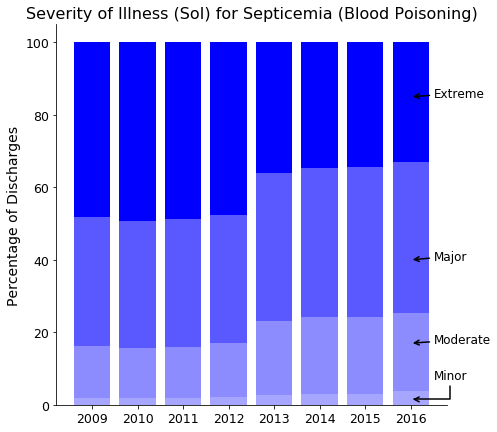

In [20]:
fig5 = plt.figure(figsize=(7,7))
ax5 = fig5.add_subplot(1,1,1)

alpha = [0.35,0.45,0.65,1]

for i in range(0,4,1):
    if i == 0: #Severity of Illness 1
        ax5.bar(Nyears,sep_SoI_perct[:,i],color='b',alpha=alpha[i])
    else: #Severity of Illness 2,3,4
        ax5.bar(Nyears,sep_SoI_perct[:,i],color='b',alpha=alpha[i],bottom=sep_SoI_perct[:,:i].sum(axis=1))

#Set X Axis
ax5.set_yticks(np.arange(0,120,20))
ax5.set_yticklabels(['0','20','40','60','80','100',],fontsize=12.5)
ax5.set_ylabel('Percentage of Discharges',fontsize=14)

ax5.set_xticks(Nyears.tolist())
ax5.set_xticklabels(Nyears.tolist(),fontsize=12.5)

#Plot Aesthetics
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.set_title('Severity of Illness (SoI) for Septicemia (Blood Poisoning)',fontsize=16)

#Annotate Graph
ax5.annotate('Minor',xy=(2016,1.5),xytext=(2016.5,7),arrowprops=dict(linewidth=1.5,
                                                                     facecolor='black',
                                                                     arrowstyle='->',
                                                                     connectionstyle='angle,angleA=90,angleB=0'),
                                                                     fontsize=12)
ax5.annotate('Moderate',xy=(2016,17),xytext=(2016.5,17),arrowprops=dict(linewidth=1.5,
                                                                        facecolor='black',
                                                                        arrowstyle='->',
                                                                        connectionstyle='arc3'),
                                                                        fontsize=12)
ax5.annotate('Major',xy=(2016,40),xytext=(2016.5,40),arrowprops=dict(linewidth=1.5,
                                                                        facecolor='black',
                                                                        arrowstyle='->',
                                                                        connectionstyle='arc3'),
                                                                        fontsize=12)
ax5.annotate('Extreme',xy=(2016,85),xytext=(2016.5,85),arrowprops=dict(linewidth=1.5,
                                                                        facecolor='black',
                                                                        arrowstyle='->',
                                                                        connectionstyle='arc3'),
                                                                        fontsize=12)
plt.savefig('SoI Septicemia.jpg',bbox_inches='tight')
plt.show()